In [212]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
test_id = pd.read_csv('TBN_Y_ZERO.csv')['CUST_NO']

# Browse Behavior Data

In [215]:
cust_browse_df = pd.read_csv('./TBN_CUST_BEHAVIOR.csv')
print(f'The browse data shape : {cust_browse_df.shape}')
cust_browse_df.head()

The browse data shape : (2209864, 3)


,CUST_NO,VISITDATE,PAGE
0,AZTHNWQ_LXMGIMYG,9462,http://www.esunbank.com.tw/gygrt/e2c/iougkjr/
1,AZTHNWQ_LXMGIMYG,9528,https://www.esunbank.com.tw/gygrt/wgdqth/gsxri...
2,3PY428CHUQBULFIG,9458,https://www.esunbank.com.tw/edrn/deoxt/rgws-cg...
3,JVPD1QUJWVLMZU8S,9457,https://www.esunbank.com.tw/edrn/pgusordq/fgpo...
4,JVPD1QUJWVLMZU8S,9485,https://www.esunbank.com.tw/edrn/pgusordq/fgpo...


In [216]:
def make_brower_dummy(cust_browse_df=cust_browse_df):
    page_class = []
    for url in cust_browse_df['PAGE']:
        page_class.append( url.split('/')[3] )

    cust_browse_df['page_class'] = page_class
    del cust_browse_df['PAGE']

    train_dummy = pd.get_dummies(cust_browse_df['page_class'])
    
    for col in train_dummy.columns:
        cust_browse_df[col] = train_dummy[col]
    return cust_browse_df
cust_browse_df = make_brower_dummy()
cust_browse_df.head()

,CUST_NO,VISITDATE,page_class,edrn,fgmo,gpda,gygrt,s,wgdqth
0,AZTHNWQ_LXMGIMYG,9462,gygrt,0,0,0,1,0,0
1,AZTHNWQ_LXMGIMYG,9528,gygrt,0,0,0,1,0,0
2,3PY428CHUQBULFIG,9458,edrn,1,0,0,0,0,0
3,JVPD1QUJWVLMZU8S,9457,edrn,1,0,0,0,0,0
4,JVPD1QUJWVLMZU8S,9485,edrn,1,0,0,0,0,0


In [217]:
cust_browse_df = cust_browse_df.groupby(['CUST_NO']).sum()
cust_browse_df.describe()

,VISITDATE,edrn,fgmo,gpda,gygrt,s,wgdqth
count,1.950000e+05,195000.000000,195000.000000,195000.000000,195000.000000,195000.000000,195000.000000
mean,1.076175e+05,9.267574,0.000908,0.008708,1.523226,0.532179,0.000041
std,7.236835e+05,75.423289,0.039926,0.603169,3.884734,2.288340,0.012810
min,9.448000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.555000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.858300e+04,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.595600e+04,6.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,1.050602e+08,11064.000000,5.000000,194.000000,686.000000,284.000000,4.000000


In [218]:
del_col = ['s', 'wgdqth', 'gpda', 'fgmo']
for col in del_col:
    del cust_browse_df[col]

In [219]:
####################################################

(array([1.94901e+05, 6.50000e+01, 2.10000e+01, 3.00000e+00, 1.00000e+00,
        3.00000e+00, 4.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-1.22874489e-01,  1.45463722e+01,  2.92156189e+01,  4.38848656e+01,
         5.85541123e+01,  7.32233590e+01,  8.78926057e+01,  1.02561852e+02,
         1.17231099e+02,  1.31900346e+02,  1.46569592e+02]),
 <a list of 10 Patch objects>)

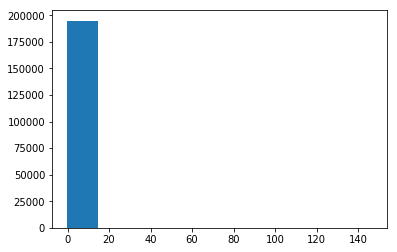

In [220]:
# edrn(39612=0);gygrt(93670=0)    ;s(171427=0)
# pd.get_dummies(cust_browse_df['edrn']).sum()
plt.figure()


plt.hist(np.log(cust_browse_df['edrn'].values + 0.1))

In [224]:
cust_browse_df['browse_edrn'] = np.log(cust_browse_df['edrn'].values + 0.1)
del cust_browse_df['edrn']

In [225]:
#########################################################

(array([9.3670e+04, 0.0000e+00, 4.9876e+04, 3.0330e+04, 1.5081e+04,
        4.8180e+03, 1.1310e+03, 8.6000e+01, 7.0000e+00, 1.0000e+00]),
 array([-2.30258509, -1.41922424, -0.5358634 ,  0.34749745,  1.2308583 ,
         2.11421915,  2.99758   ,  3.88094084,  4.76430169,  5.64766254,
         6.53102339]),
 <a list of 10 Patch objects>)

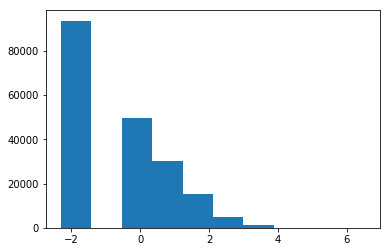

In [226]:
plt.hist(np.log(cust_browse_df['gygrt'].values + 0.1))

In [227]:
cust_browse_df['browse_gygrt'] = np.log(cust_browse_df['gygrt'].values + 0.1)
del cust_browse_df['gygrt']

In [228]:
cust_browse_df['CUST_NO'] = cust_browse_df.index # for merge format
cust_browse_df.head()

,VISITDATE,browse_edrn,browse_gygrt,CUST_NO
CUST_NO,,,,
---CHVW7DUN8SZLO,142636,2.646175,0.095310,---CHVW7DUN8SZLO
--1YNJZSSOXDF6UU,85422,1.131402,1.808289,--1YNJZSSOXDF6UU
--2YJM1RA5I5NQBC,9455,0.095310,-2.302585,--2YJM1RA5I5NQBC
--3HR4AMZR7EWEKS,18998,-2.302585,0.741937,--3HR4AMZR7EWEKS
--3NF5SUEEEAWOPI,266176,3.299534,0.095310,--3NF5SUEEEAWOPI


In [229]:
# 次數重要：這一層就好，處理數字
# 種類重要: 下一層，找出瀏覽量多的種類

# Custom persional data

In [353]:
# TBN_CIF.csv' 

cust_persional_df = pd.read_csv('./TBN_CIF.csv')
print(f'The browse data shape : {cust_persional_df.shape}')
cust_persional_df.head()

The browse data shape : (187679, 8)


,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS
0,UFUIMEGMK2KTIWI4,1,NaN,2.0,NaN,NaN,NaN,NaN
1,3HJN2X_LGBHBKILI,3,0.0,9393.0,NaN,NaN,1.0,NaN
2,MNEZK2O3OE-JHYBW,4,0.0,2912.0,3.0,M,2.0,2.0
3,W7ADZSWYXEMHB7JQ,4,0.0,8332.0,5.0,M,2.0,1.0
4,ODB6BA6ORHL2UYZE,4,0.0,744.0,3.0,M,2.0,1.0


In [354]:
cust_persional_df.describe()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,INCOME_RANGE_CODE,WORK_MTHS
count,187679.000000,187247.000000,187679.000000,158691.000000,187297.000000,151489.000000
mean,2.511053,0.023509,6260.023998,3.632077,1.208236,1.058757
std,1.105938,0.224682,2385.903856,1.211771,0.536134,0.238984
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,4296.000000,3.000000,1.000000,1.000000
50%,3.000000,0.000000,6747.000000,3.000000,1.000000,1.000000
75%,3.000000,0.000000,8367.000000,5.000000,1.000000,1.000000
max,4.000000,10.000000,9567.000000,6.000000,4.000000,5.000000


In [355]:
# Check missing data
cust_persional_df.isnull().sum().sort_values(ascending=False)

WORK_MTHS            36190
EDU_CODE             28988
GENDER_CODE           1994
CHILDREN_CNT           432
INCOME_RANGE_CODE      382
CUST_START_DT            0
AGE                      0
CUST_NO                  0
dtype: int64

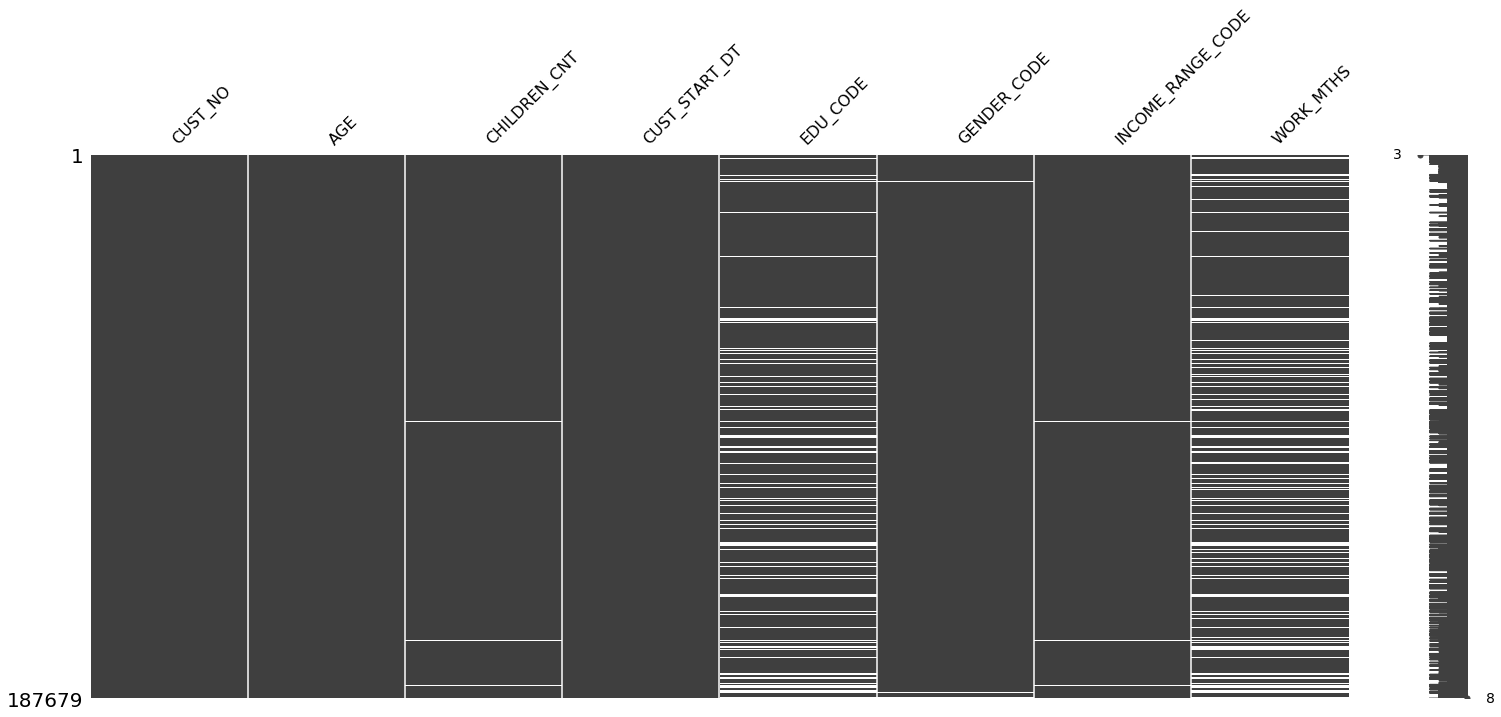

In [356]:
import missingno as msno
msno.matrix(cust_persional_df,)

In [357]:
cust_persional_df.corr()

,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,INCOME_RANGE_CODE,WORK_MTHS
AGE,1.000000,0.091791,-0.563027,0.070585,0.265346,0.216340
CHILDREN_CNT,0.091791,1.000000,-0.059024,0.039265,-0.019503,0.021085
CUST_START_DT,-0.563027,-0.059024,1.000000,-0.009531,-0.207091,-0.088363
EDU_CODE,0.070585,0.039265,-0.009531,1.000000,-0.086145,-0.002276
INCOME_RANGE_CODE,0.265346,-0.019503,-0.207091,-0.086145,1.000000,0.122250
WORK_MTHS,0.216340,0.021085,-0.088363,-0.002276,0.122250,1.000000


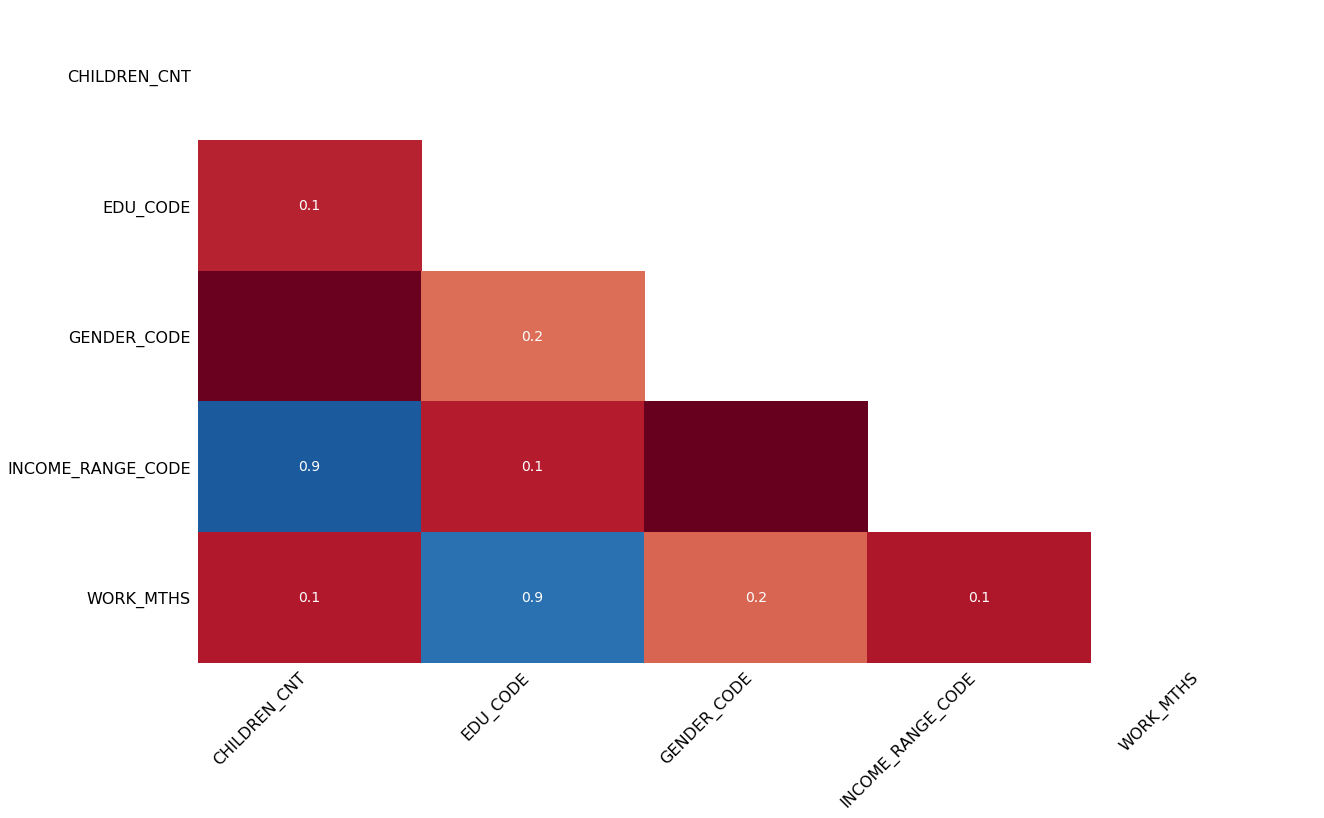

In [358]:
msno.heatmap(cust_persional_df,)

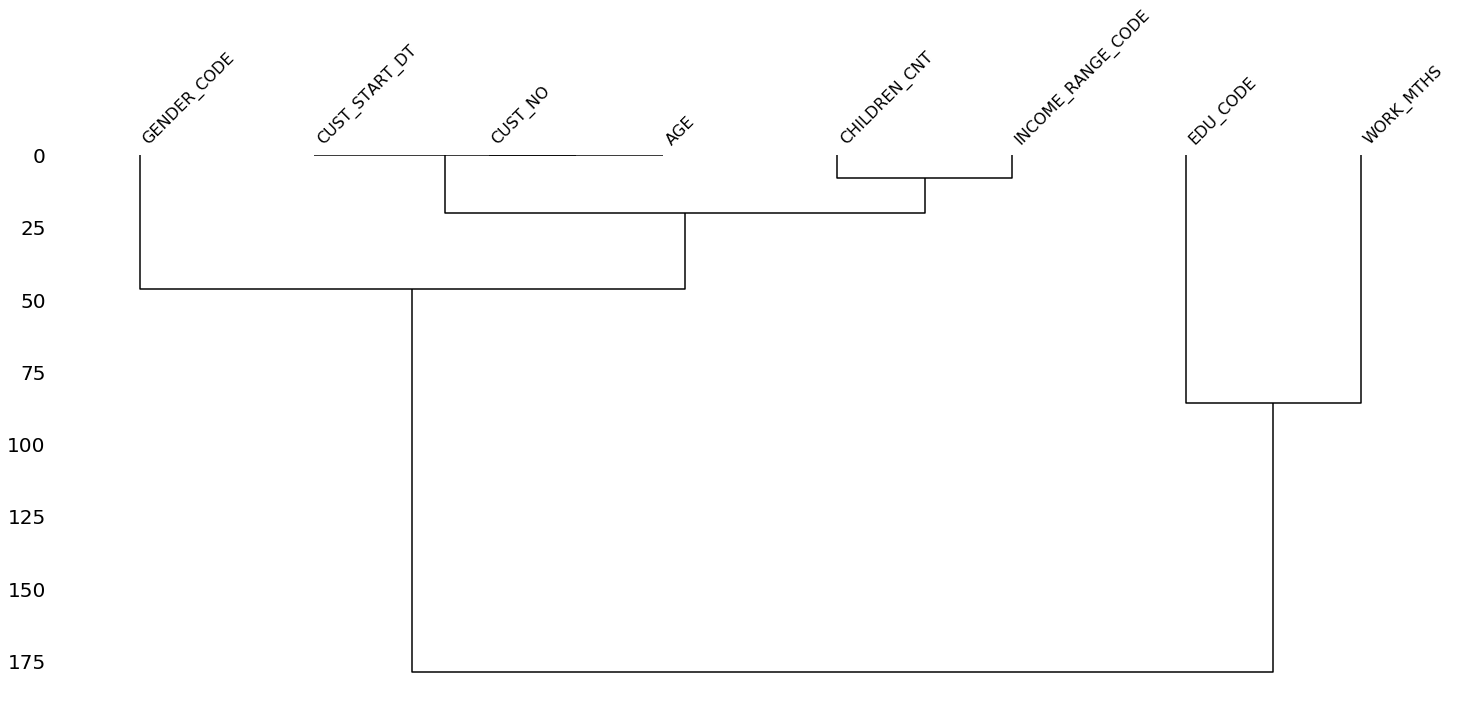

In [359]:
msno.dendrogram(cust_persional_df,)

In [360]:
# AGE
print('AGE')
age_sum = pd.get_dummies(cust_persional_df['AGE'].values).sum()
age_sum

AGE


1    45810
2    45661
3    50692
4    45516
dtype: int64

In [361]:
###################################################

(array([ 1975.,  5930., 10512., 17069., 23615., 16790., 16957., 25049.,
        32016., 37766.]),
 array([   0. ,  956.7, 1913.4, 2870.1, 3826.8, 4783.5, 5740.2, 6696.9,
        7653.6, 8610.3, 9567. ]),
 <a list of 10 Patch objects>)

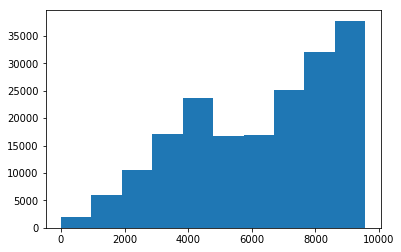

In [362]:
# View CUST_START_DT
plt.hist(cust_persional_df['CUST_START_DT'].values)
# range class 

In [363]:

bins = [-0.1, 4296, 6747 ,8367, 9568]

cust_persional_df['START_DT_BINS'] = pd.cut(cust_persional_df['CUST_START_DT'].values, 
                                            bins,
                                            labels=[.4, .3, .2, .1],)
del cust_persional_df['CUST_START_DT']
#pd.value_counts(pd.cut(cust_persional_df['CUST_START_DT'].values, bins))

In [364]:
#################################################

In [365]:
# CHILDREN_CNT
print(cust_persional_df['CHILDREN_CNT'].sum()/cust_persional_df['CHILDREN_CNT'].count())
del cust_persional_df['CHILDREN_CNT'] # almost zero value
print('this feature almost 0')

0.023509054884724455
this feature almost 0


In [366]:
#################################################

In [367]:
# View Gender_CODE
print('F%: ',sum(cust_persional_df['GENDER_CODE'] == 'F') / cust_persional_df['GENDER_CODE'].shape[0])
print('miss data only 0.01%, give F maybe is a convenience way!!')

# Fill gender missing data by 'F'
temp_arr = cust_persional_df['GENDER_CODE'].values == 'M'
cust_persional_df['GENDER_CODE'] = temp_arr + 0
del temp_arr

F%:  0.5588531481945236
miss data only 0.01%, give F maybe is a convenience way!!


In [368]:
##################################################

In [369]:
# INCOME_RANGE_CODE
print('INCOME_RANGE_CODE')
incom_sum = pd.get_dummies(cust_persional_df['INCOME_RANGE_CODE'].values).sum()
incom_sum

INCOME_RANGE_CODE


1.0    157071
2.0     24152
3.0      3372
4.0      2702
dtype: int64

<BarContainer object of 4 artists>

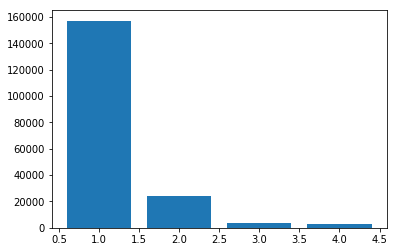

In [370]:
plt.figure()
plt.bar(incom_sum.index, list(incom_sum))

In [371]:
cust_persional_df['INCOME_RANGE_CODE'] = np.array(cust_persional_df['AGE'] * 
                                                  cust_persional_df['INCOME_RANGE_CODE'].isnull()+
                                                 cust_persional_df['INCOME_RANGE_CODE'].fillna(0))

In [372]:
####################################################

In [373]:
# EDU_CODE
pd.get_dummies(cust_persional_df['EDU_CODE']).sum()

1.0     1986
2.0    20252
3.0    67722
4.0    28982
5.0    23700
6.0    16049
dtype: int64

In [374]:
# Missing 常態分佈處理
cust_persional_df['EDU_CODE'] = np.array(np.around(np.random.normal(3.632077, 1.211771, size=len(cust_persional_df['EDU_CODE']))) * 
                                          cust_persional_df['EDU_CODE'].isnull()+
                                          cust_persional_df['EDU_CODE'].fillna(0))

cust_persional_df['EDU_CODE'] = cust_persional_df['EDU_CODE'].replace([7., 8., 9., 10., 11., 12.,], 6.)
cust_persional_df['EDU_CODE'] = cust_persional_df['EDU_CODE'].replace([0., -1., -2., -3., -4., -5.,], 1.)

In [375]:
###################################################

In [376]:
# View WORK_MTHS
pd.get_dummies(cust_persional_df['WORK_MTHS']).sum()

1.0    142705
2.0      8684
3.0        86
4.0        11
5.0         3
dtype: int64

In [377]:
cust_persional_df['WORK_MTHS'] = np.array(cust_persional_df['INCOME_RANGE_CODE'] * 
                                          cust_persional_df['WORK_MTHS'].isnull()+
                                          cust_persional_df['WORK_MTHS'].fillna(0))

In [378]:
cust_persional_df['WORK_MTHS'] = cust_persional_df['WORK_MTHS'].replace([5., 4,], 3.)

In [379]:
# Check missing data
cust_persional_df.isnull().sum().sort_values(ascending=False)

START_DT_BINS        0
WORK_MTHS            0
INCOME_RANGE_CODE    0
GENDER_CODE          0
EDU_CODE             0
AGE                  0
CUST_NO              0
dtype: int64

In [380]:
cust_persional_df.head()

,CUST_NO,AGE,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,START_DT_BINS
0,UFUIMEGMK2KTIWI4,1,4.0,0,1.0,1.0,0.4
1,3HJN2X_LGBHBKILI,3,3.0,0,1.0,1.0,0.1
2,MNEZK2O3OE-JHYBW,4,3.0,1,2.0,2.0,0.4
3,W7ADZSWYXEMHB7JQ,4,5.0,1,2.0,1.0,0.2
4,ODB6BA6ORHL2UYZE,4,3.0,1,2.0,1.0,0.4


In [381]:
type(cust_persional_df['START_DT_BINS'][0])

numpy.float64

In [ ]:
# standardzation
std_col = ['AGE', 'EDU_CODE', 'INCOME_RANGE_CODE', 'WORK_MTHS']
for col in std_col:
    print(col)
    cust_persional_df[col] = preprocessing.scale(cust_persional_df[col].values)

In [383]:
cust_persional_df.head()

,CUST_NO,AGE,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,START_DT_BINS
0,UFUIMEGMK2KTIWI4,-1.366313,0.306842,0,-0.389091,-0.222357,0.4
1,3HJN2X_LGBHBKILI,0.442111,-0.518944,0,-0.389091,-0.222357,0.1
2,MNEZK2O3OE-JHYBW,1.346323,-0.518944,1,1.468985,4.154785,0.4
3,W7ADZSWYXEMHB7JQ,1.346323,1.132628,1,1.468985,-0.222357,0.2
4,ODB6BA6ORHL2UYZE,1.346323,-0.518944,1,1.468985,-0.222357,0.4


# CC Data (as Feature)

In [384]:
CC_df = pd.read_csv('TBN_CC_APPLY.csv')
CC_df.head()

,CUST_NO,TXN_DT
0,8H_N_K5ICM4NU7OG,9519
1,HXD9GCY3SPIYLJS0,9451
2,KSBOZ-TBPUDD9NMO,9502
3,MU8ROCNFDGSL0HJC,9549
4,RGZZAUSNHNXXESM4,9561


In [385]:
CC_count = CC_df.groupby(['CUST_NO']).count()
CC_count = CC_count.rename(columns={'TXN_DT':'count'})
CC_count.describe()

,count
count,44112.000000
mean,1.233066
std,0.721128
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,30.000000


(array([3.7173e+04, 5.1920e+03, 0.0000e+00, 1.4550e+03, 1.0700e+02,
        1.1500e+02, 5.2000e+01, 1.2000e+01, 5.0000e+00, 1.0000e+00]),
 array([0.09531018, 0.42623168, 0.75715318, 1.08807468, 1.41899618,
        1.74991768, 2.08083917, 2.41176067, 2.74268217, 3.07360367,
        3.40452517]),
 <a list of 10 Patch objects>)

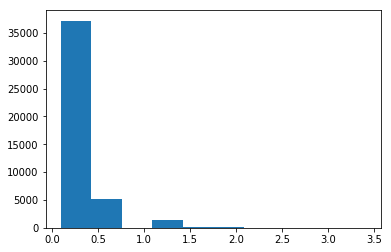

In [387]:
plt.figure()
plt.hist(np.log(CC_count['count'].values+0.1))

In [389]:
pd.get_dummies(CC_count['count']).sum()

1     37173
2      5192
3       954
4       501
5       107
6        96
7        19
8        29
9         9
10        8
11        6
12        8
13        2
14        1
15        1
16        1
17        2
18        2
30        1
dtype: int64

In [438]:
CC_count['count'] = np.log(CC_count['count'].values+0.1)
CC_count['CUST_NO'] = CC_count.index # for merge format
CC_count.head()

,count,CUST_NO
CUST_NO,,
---CHVW7DUN8SZLO,0.741937,---CHVW7DUN8SZLO
--37ZQ9XGUMXZASK,0.095310,--37ZQ9XGUMXZASK
--55JSAQ0THV0RMA,0.095310,--55JSAQ0THV0RMA
--AEHX30X32VHK3Y,0.095310,--AEHX30X32VHK3Y
--AKTEGTKD38U3BY,0.095310,--AKTEGTKD38U3BY


# LN Data

In [439]:
# TBN_LN_APPLY.csv (信貸）
LN_df = pd.read_csv('TBN_LN_APPLY.csv')
print(f'The data shape is : {LN_df.shape}')
print('Unrepeat custom id:', len(set(LN_df['CUST_NO'])))
LN_df.head()

The data shape is : (6741, 4)
Unrepeat custom id: 6654


,CUST_NO,TXN_DT,LN_AMT,LN_USE
0,JZKEGB1J3FEPXGWA,9455,904731,06
1,TKTH9UXLWDVLA8E4,9472,1218170,01
2,KZ0XPLZI-NGTHTDE,9505,1183088,01
3,BT5INBWYOZQK8CDY,9457,848097,05
4,Z5H7IUX8VPUMWWY8,9473,848097,01


In [440]:
pd.get_dummies(LN_df['LN_USE']).sum()

01     147
02    1032
03     121
04     290
05     867
06    1182
07     388
08     212
09     187
0Z       6
10       4
11     107
12       9
14    1644
15      39
16      25
17       6
18     330
19      58
20       7
21      80
dtype: int64

In [441]:
# 'LN_USE' include  '01'-'09'  '10'-'12'  '14'-'21', and '0Z'
LN_df['LN_USE'] = LN_df['LN_USE'].replace('0Z', '13')
LN_df['LN_USE'] = LN_df['LN_USE'].values.astype(np.int16)

In [442]:
def get_dummy_col(df, target_col=''):
    dummy = pd.get_dummies(df[target_col])
    for col in dummy.columns:
        df[col] = dummy[col]
    del df[target_col]
    return df
LN_df = get_dummy_col(df=LN_df, target_col='LN_USE')
LN_df.head()

,CUST_NO,TXN_DT,LN_AMT,1,2,3,4,5,6,7,...,12,13,14,15,16,17,18,19,20,21
0,JZKEGB1J3FEPXGWA,9455,904731,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,TKTH9UXLWDVLA8E4,9472,1218170,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,KZ0XPLZI-NGTHTDE,9505,1183088,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BT5INBWYOZQK8CDY,9457,848097,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Z5H7IUX8VPUMWWY8,9473,848097,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Cluster : Interactive id

In [443]:
browse_persional_test = set(cust_browse_df.index) & set(cust_persional_df['CUST_NO']) & set(test_id)
print(len(browse_persional_test))

29854


In [444]:
LN_browse_persional = set(cust_browse_df.index) & set(LN_df['CUST_NO']) & set(cust_persional_df['CUST_NO'])
len(LN_browse_persional)

1081

In [445]:
df_browse_persional_test = pd.DataFrame()
df_browse_persional_test['CUST_NO']= list(browse_persional_test | LN_browse_persional)

#merage_op = {'inner':cust_persional_df, 'left':cust_browse_df, 'left':CC_count}

#for how, df in merage_op.items():
#    df_browse_persional_test = pd.merge(
#                                    df_browse_persional_test, df, 
#                                    how=how, left_on='CUST_NO', right_on='CUST_NO')

df_browse_persional_test = pd.merge(
                                    df_browse_persional_test, cust_persional_df, 
                                    how='inner', left_on='CUST_NO', right_on='CUST_NO')

df_browse_persional_test = pd.merge(
                                    df_browse_persional_test, cust_browse_df, 
                                    how='inner', left_on='CUST_NO', right_on='CUST_NO')


df_browse_persional_test = pd.merge(
                                    df_browse_persional_test, CC_count, 
                                    how='left', left_on='CUST_NO', right_on='CUST_NO')

    
df_browse_persional_test['count'] = df_browse_persional_test['count'].fillna(0)
del df_browse_persional_test['VISITDATE']
print(df_browse_persional_test.shape)
df_browse_persional_test.head()

(30530, 10)


/home/rsa-key-20181105/anaconda3/envs/facewap/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning: 'CUST_NO' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,CUST_NO,AGE,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,START_DT_BINS,browse_edrn,browse_gygrt,count
0,RCE0DTZYQXYLAQ8C,1.346323,-0.518944,1,-0.389091,-0.222357,0.1,-2.302585,-2.302585,0.00000
1,VNZ_EP3QFHRWTWHY,0.442111,-0.518944,1,-0.389091,-0.222357,0.4,-2.302585,0.095310,0.00000
2,QDUDYBMK4VKCSHYM,-1.366313,-0.518944,0,-0.389091,-0.222357,0.1,1.960095,1.131402,0.09531
3,NJANVPUWLSX0R_XK,-0.462101,-0.518944,0,-0.389091,-0.222357,0.3,2.406945,-2.302585,0.09531
4,2RNOB_YKALVLIC2E,-0.462101,1.958414,1,1.468985,-0.222357,0.2,0.095310,-2.302585,0.00000


In [446]:
cust_id = df_browse_persional_test['CUST_NO'].values
del df_browse_persional_test['CUST_NO']

In [447]:
main_label = []
for the_id in cust_id:
    if the_id in LN_browse_persional:
        main_label.append(1)
    else:
        main_label.append(0)
main_label = np.array(main_label)    

# Cosine

# PCA

In [449]:
import numpy as np

In [457]:
df_browse_persional_test.corr()

,AGE,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,browse_edrn,browse_gygrt,count
AGE,1.000000,0.062531,-0.000221,0.260916,0.192046,-0.010814,0.084256,-0.008975
EDU_CODE,0.062531,1.000000,-0.064009,-0.078411,-0.000042,-0.024994,0.006056,-0.013806
GENDER_CODE,-0.000221,-0.064009,1.000000,0.079833,0.018729,-0.061003,-0.002798,0.011090
INCOME_RANGE_CODE,0.260916,-0.078411,0.079833,1.000000,0.200656,0.072849,0.044496,0.084963
WORK_MTHS,0.192046,-0.000042,0.018729,0.200656,1.000000,-0.003563,0.021817,0.033128
browse_edrn,-0.010814,-0.024994,-0.061003,0.072849,-0.003563,1.000000,0.032806,0.056053
browse_gygrt,0.084256,0.006056,-0.002798,0.044496,0.021817,0.032806,1.000000,0.057661
count,-0.008975,-0.013806,0.011090,0.084963,0.033128,0.056053,0.057661,1.000000


In [450]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
pca.fit(df_browse_persional_test)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [451]:
PCA_X = pca.transform(df_browse_persional_test)

In [452]:
from sklearn.cluster import KMeans

In [453]:
km = KMeans(n_clusters=3)
km.fit(PCA_X)
km.labels_

array([0, 0, 1, ..., 2, 0, 0], dtype=int32)

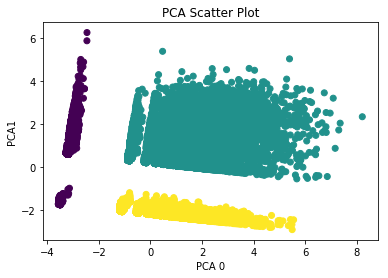

In [454]:
plt.figure()
plt.scatter(PCA_X[:,0], PCA_X[:,1], c=km.labels_)
plt.xlabel('PCA 0')
plt.ylabel('PCA1')
plt.title("PCA Scatter Plot")
plt.show()

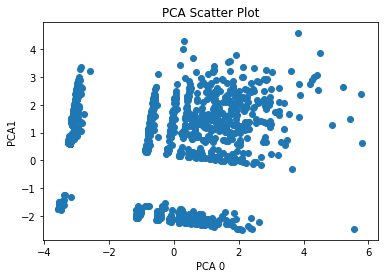

In [455]:
main_labe_pca = PCA_X[np.where(main_label==1)[0]]

plt.figure()
plt.scatter(main_labe_pca[:,0], main_labe_pca[:,1])
plt.xlabel('PCA 0')
plt.ylabel('PCA1')
plt.title("PCA Scatter Plot")
plt.show()